In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Population: y=x^2 + e
# e is a normally distributed error term
# -1 < x < 1

In [3]:
def sample(n):
    '''
    Draw a random sample from our population
    '''
    X = np.random.rand(n) * 2 - 1
    y = np.square(X) + np.random.normal(scale=0.5, size=X.shape[0])
    X = np.expand_dims(X, 1)
    return X, y

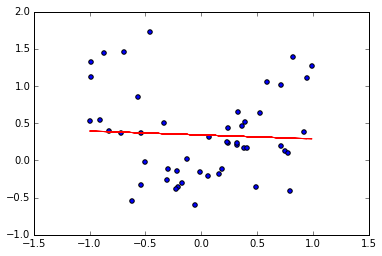

In [12]:
X, y = sample(50)
lr = LinearRegression()
lr.fit(X, y)
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='r')

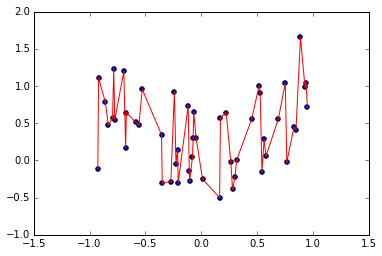

In [5]:
X, y = sample(50)
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
plt.scatter(X, y)
plt.plot(sorted(X), dtr.predict(sorted(X)), color='r')

In [13]:
def train_models(samples=75, model=DecisionTreeRegressor, num_models=25):
    """
    Trains num_models models each based on a random draw of data from our population. 
    """
    models = []
    for i in range(num_models):
        X, y = sample(samples)
        m = model()
        m.fit(X, y)
        models.append(m)
    return models

In [14]:
def multi_predict(estimators, X):
    """
    Given a list of estimators and some data returns a matrix of 
    each estimators prediction for each row of X
    """
    outputs = np.zeros((len(estimators), X.shape[0]))

    for i, decision_tree in enumerate(estimators):
        for j in range(X.shape[0]):
            outputs[i, j] = estimators[i].predict(X[j])
    return outputs

In [15]:
def plot_predictions(predictions1, predictions2, X, true_labels):
    
    # Two subplots, unpack the axes array immediately
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,5))
    
    x_axis = range(true_labels.shape[0])
    mean_predictions1 = np.mean(predictions1, axis=0)
    mean_predictions2 = np.mean(predictions2, axis=0)
    
    ax1.set_title('Linear Regression: High Bias, Low Variance')
    ax1.scatter(np.repeat(X, predictions1.shape[0], axis=1).T, predictions1, alpha=0.25, label='prediction')
    ax1.scatter(X, true_labels, c='r', marker='x', linewidths=2, s=75, label='true label')
    ax1.scatter(X, mean_predictions1, c='g', marker='o', linewidths=0, s=50, label='average prediction')
    ax1.grid()
    ax1.legend()
    
    ax2.set_title('Decision Tree: Low Bias, High Variance')
    ax2.scatter(np.repeat(X, predictions2.shape[0], axis=1).T, predictions2, alpha=0.25, label='prediction')
    ax2.scatter(X, true_labels, c='r', marker='x', linewidths=2, s=75, label='true label')
    ax2.scatter(X, mean_predictions2, c='g', marker='o', linewidths=0, s=50, label='average prediction')
    ax2.grid()
    ax2.legend()

In [16]:
X = np.linspace(-.5, .5, num=5)
X = np.expand_dims(X, 1)
lr_predictions = multi_predict(train_models(model=LinearRegression), X)
dtr_predictions = multi_predict(train_models(model=DecisionTreeRegressor), X)

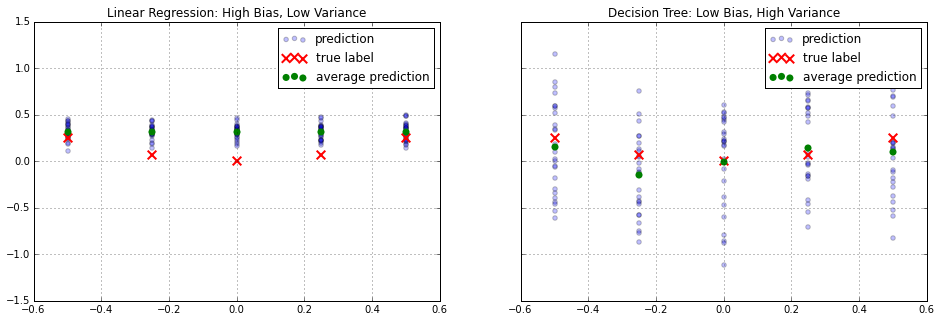

In [17]:
plot_predictions(lr_predictions, dtr_predictions, X, np.square(X))

In [11]:
augmented_df.columns

NameError: name 'augmented_df' is not defined

##Bias Variance Tradeoff

Now we are going to train a bunch of regression trees on random subsets of the test data with a goal of studying the bias and variance

In [ ]:
num_models = 100
num_examples = 5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1)

In [ ]:
rf = RandomForestRegressor(n_estimators=num_models, max_depth=20).fit(X_train, y_train)
# estimators in the random forest are engineered to be high variance and low bias
high_variance_estimators = rf.estimators_
high_variance_estimators[0]